# Playing with Qiskit - importing and init an IBMQ account

In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.1',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.5.0',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.16.1'}

In [3]:
from qiskit import IBMQ

getting the IBMQ account number

In [4]:
IBMQ.save_account('3a021945eb44680fca0c993cb2f2a5e77367d1f3bd864751eea846b3b1dfc684562a02d1a1e1919357b0ed5f5c35ba93653121d2ee4d50d97aa6275b7c5f7276')

In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Simulating a 2 qubit bell state quantum circuit on a simulator

In [6]:
from qiskit import *

In [7]:
qr = QuantumRegister(2)

In [8]:
cr = ClassicalRegister(2)

In [9]:
circuit = QuantumCircuit(qr, cr)

In [10]:
matplotlib inline

In [11]:
circuit.draw()

q0_0: |0>
         
q0_1: |0>
         
 c0_0: 0 
         
 c0_1: 0

In [12]:
circuit.h(qr[0])

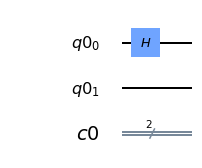

In [13]:
circuit.draw(output='mpl')

In [14]:
circuit.cx(qr[0], qr[1])

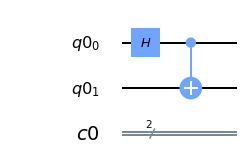

In [15]:
circuit.draw(output='mpl')

In [16]:
circuit.measure(qr, cr)

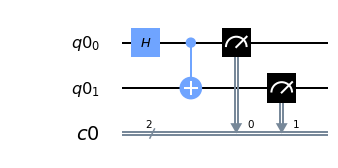

In [17]:
circuit.draw(output='mpl')

In [19]:
simulator = Aer.get_backend('qasm_simulator')

In [21]:
result = execute(circuit, backend = simulator).result()

In [22]:
from qiskit.tools.visualization import plot_histogram

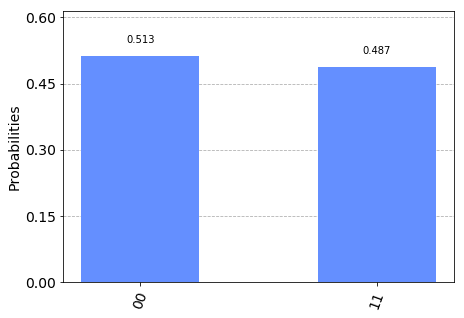

In [23]:
plot_histogram(result.get_counts(circuit))

Simulating the same 2 qubit bell state quantum circuit on a real quantum computer

In [24]:
provider = IBMQ.get_provider('ibm-q')

In [26]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [27]:
job = execute(circuit, backend=qcomp)

In [28]:
from qiskit.tools.monitor import job_monitor

In [29]:
job_monitor(job)

Job Status: job has successfully run


In [31]:
result = job.result()

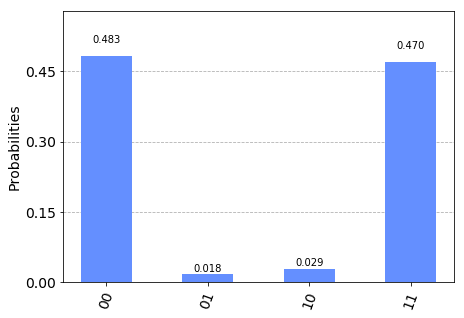

In [32]:
plot_histogram(result.get_counts(circuit))